In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


here the objective is to fit the logit graph model to multiple different graph domains and then visualize the original vs fitted graphs

In [6]:

import sys
import os
sys.path.append('../..')

#Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils
import src.model_selection as model_selection
import src.gic as gic
import src.param_estimator as pe
import src.graph as graph
import src.model_selection as ms

# usual imports
import matplotlib.pyplot as plt
import pickle
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
from numpy import errstate

from IPython.display import display
from pyvis.network import Network
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [17]:
FOLDER_OUTPUT = f'runs/fitted_graphs_comparison_twitter2'
out_files = os.listdir(FOLDER_OUTPUT)
out_files = sorted(out_files, key=lambda x: os.path.getctime(os.path.join(FOLDER_OUTPUT, x)), reverse=True)

out_files

['comparators_170729553.pkl',
 'comparators_134943586.pkl',
 'comparators_19948202.pkl',
 'comparators_24117694.pkl',
 'comparators_15329577.pkl',
 'comparators_18923866.pkl',
 'comparators_7668362.pkl',
 'comparators_20060293.pkl',
 'comparators_45753733.pkl',
 'comparators_745823.pkl',
 'comparators_121202578.pkl',
 'comparators_16616109.pkl',
 'comparators_14134942.pkl',
 'comparators_35012599.pkl',
 'comparators_290092792.pkl',
 'comparators_74651704.pkl',
 'comparators_88639412.pkl',
 'comparators_58427526.pkl',
 'comparators_1367531.pkl',
 'comparators_423567032.pkl',
 'comparators_7890392.pkl',
 'comparators_24479656.pkl',
 'comparators_16183380.pkl',
 'comparators_86560711.pkl',
 'comparators_166214735.pkl',
 'comparators_165786567.pkl',
 'comparators_23742633.pkl',
 'comparators_1271901.pkl',
 'comparators_8914942.pkl',
 'comparators_12831.pkl',
 'comparators_15938936.pkl',
 'comparators_809864.pkl',
 'comparators_79797834.pkl',
 'comparators_187569483.pkl',
 'comparators_3143

In [18]:
import pickle
#pick first id from out_files
id = out_files[0].split('_')[1]

with open(f'{FOLDER_OUTPUT}/comparators_{id}', 'rb') as f:
    comparators = pickle.load(f)


In [19]:
len(comparators)

613

In [20]:
dfs = []
for i in range(len(comparators)):
    dfs.append(comparators[i].summary_df)

In [21]:
dfs[1]

graph_filename     model  gic_value               param  fit_success  \
0  23503181.edges  Original        NaN                 N/A         True   
1  23503181.edges        LG   0.607217  d=0, sigma=-4.7309         True   
2  23503181.edges        BA   0.794000                 5.0         True   
3  23503181.edges        ER   0.895800                 0.2         True   
4  23503181.edges        WS   1.357592                20.2         True   
5  23503181.edges       GRG   4.342647                 1.0         True   

   nodes  edges   density  avg_clustering  avg_path_length  diameter  \
0    101   1455  0.288119        0.612132         1.786733         3   
1    101   1483  0.293663        0.289578         1.706337         2   
2    101    480  0.095050        0.207917         2.228119         4   
3    101   1009  0.199802        0.203781         1.814059         3   
4    101   1414  0.280000        0.270688         1.720000         2   
5    101   4920  0.974257        0.977088         1.025743         2   

   assortativity  num_components  largest_component_size  
0      -0.173453               1                     101  
1       0.028727               1                     101  
2      -0.145265               1                     101  
3      -0.034338               1                     101  
4      -0.048588               1                     101  
5      -0.059051               1                     101

In [22]:
pd.concat(dfs)

graph_filename     model  gic_value               param  fit_success  \
0   134208594.edges  Original        NaN                 N/A         True   
1   134208594.edges        LG   0.221459  d=1, sigma=-5.0081         True   
2   134208594.edges        ER   0.401087                 0.2         True   
3   134208594.edges        BA   0.726020                 5.0         True   
4   134208594.edges        WS   1.488809           20.115556         True   
..              ...       ...        ...                 ...          ...   
1   170729553.edges        LG   1.126572  d=0, sigma=-4.8802         True   
2   170729553.edges        BA   0.644197                 5.0         True   
3   170729553.edges        ER   1.121070                 0.2         True   
4   170729553.edges        WS   1.401013           20.157778         True   
5   170729553.edges       GRG   3.744964                 1.0         True   

    nodes  edges   density  avg_clustering  avg_path_length  diameter  \
0     100   1677  0.338788        0.612483         1.692929         3   
1     100   1728  0.349091        0.348108         1.650909         2   
2     100    967  0.195354        0.200268         1.823030         3   
3     100    475  0.095960        0.180920         2.215354         4   
4     100   1700  0.343434        0.342668         1.656566         2   
..    ...    ...       ...             ...              ...       ...   
1     247   5680  0.186959        0.188448         1.813140         3   
2     247   1210  0.039828        0.114012         2.522794         4   
3     247   6049  0.199105        0.198533         1.800994         3   
4     247   5681  0.186992        0.184771         1.813008         2   
5     247  29869  0.983147        0.984868         1.016853         2   

    assortativity  num_components  largest_component_size  
0       -0.101428               1                     100  
1       -0.000698               1                     100  
2       -0.041869               1                     100  
3       -0.102322               1                     100  
4       -0.035174               1                     100  
..            ...             ...                     ...  
1       -0.007290               1                     247  
2       -0.103971               1                     247  
3       -0.002413               1                     247  
4       -0.017125               1                     247  
5       -0.037677               1                     247  

[3678 rows x 14 columns]

In [23]:
# Create a DataFrame with GIC values for each model and graph
gic_df = pd.DataFrame()

for df in dfs:
    graph_name = df['graph_filename'].iloc[0]
    # Get GIC values for each model (excluding Original which has NaN)
    model_gics = df[df['model'] != 'Original'].set_index('model')['gic_value']
    gic_df[graph_name] = model_gics

# Transpose so graphs are rows and models are columns
gic_df = gic_df.T
gic_df

/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9183/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gic_df[graph_name] = model_gics
/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9183/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gic_df[graph_name] = model_gics
/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9183/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

model                  LG        ER        BA        WS       GRG
134208594.edges  0.221459  0.401087  0.726020  1.488809  2.790217
23503181.edges   0.607217  0.895800  0.794000  1.357592  4.342647
28628055.edges   0.602074  0.623979  0.493038  1.253269  6.488222
5773532.edges    0.216907  0.787361  0.397202  1.109180  8.512284
54226675.edges   0.878819  0.888912  0.267858  1.301996  6.178167
...                   ...       ...       ...       ...       ...
15329577.edges   1.004214  0.968814  0.617295  1.237131  5.753914
24117694.edges   0.247725  0.260153  0.743051  1.704121  1.791401
19948202.edges   0.325515  0.316089  0.534699  1.473538  3.863162
134943586.edges  0.236541  0.241362  0.597309  1.642894  2.228189
170729553.edges  1.126572  1.121070  0.644197  1.401013  3.744964

[613 rows x 5 columns]

In [24]:
# Create a dictionary to store rankings for each graph
rankings = {}

# Go through each df in dfs
for df in dfs:
    graph_name = df['graph_filename'].iloc[0]  # Get graph filename
    
    # Sort models by GIC value (excluding 'Original' which has NaN GIC)
    model_ranks = df[df['model'] != 'Original'].sort_values('gic_value')['model'].tolist()
    
    # Create rankings dictionary for this graph (1 is best since lowest GIC is best)
    rankings[graph_name] = {
        model: rank+1 for rank, model in enumerate(model_ranks)
    }
    
    # Add nodes and edges from Original model
    original_row = df[df['model'] == 'Original'].iloc[0]
    rankings[graph_name]['nodes'] = original_row['nodes']
    rankings[graph_name]['edges'] = original_row['edges']

# Get unique models (excluding 'Original')
models = sorted(list(set([model for df in dfs for model in df['model'].unique() if model != 'Original'])))

# Create DataFrame with rankings
ranking_df = pd.DataFrame(rankings).T

# Ensure all models are present as columns
for model in models:
    if model not in ranking_df.columns:
        ranking_df[model] = np.nan

# Keep only the model columns in a consistent order, plus nodes and edges
ranking_df = ranking_df[models + ['nodes', 'edges']]

print("Rankings by GIC value (lower is better):")
display(ranking_df)


Rankings by GIC value (lower is better):


BA  ER  GRG  LG  WS  nodes  edges
134208594.edges   3   2    5   1   4    100   1677
23503181.edges    2   3    5   1   4    101   1455
28628055.edges    1   3    5   2   4    101   1105
5773532.edges     2   3    5   1   4    101    841
54226675.edges    1   3    5   2   4    102    953
...              ..  ..  ...  ..  ..    ...    ...
15329577.edges    1   2    5   3   4    246   3176
24117694.edges    3   2    5   1   4    246   6329
19948202.edges    3   1    5   2   4    246   4753
134943586.edges   3   2    5   1   4    247   6271
170729553.edges   1   2    5   3   4    247   5629

[613 rows x 7 columns]

In [28]:
ranking_df.head(500).mean(axis=0)

BA          2.168
ER          2.682
GRG         4.948
LG          2.106
WS          3.096
nodes     160.376
edges    2166.456
dtype: float64

In [29]:
ranking_df['nodes'].describe()

count    613.000000
mean     173.073409
std       39.816074
min      100.000000
25%      140.000000
50%      176.000000
75%      206.000000
max      247.000000
Name: nodes, dtype: float64

# Gen all Plots

twitter_0


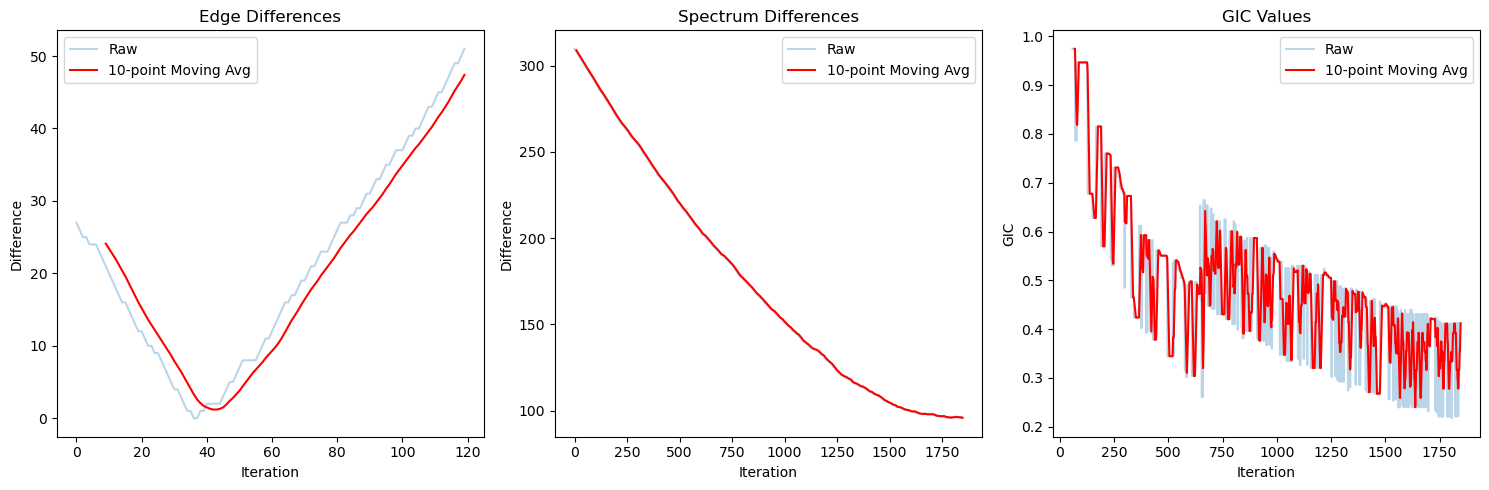

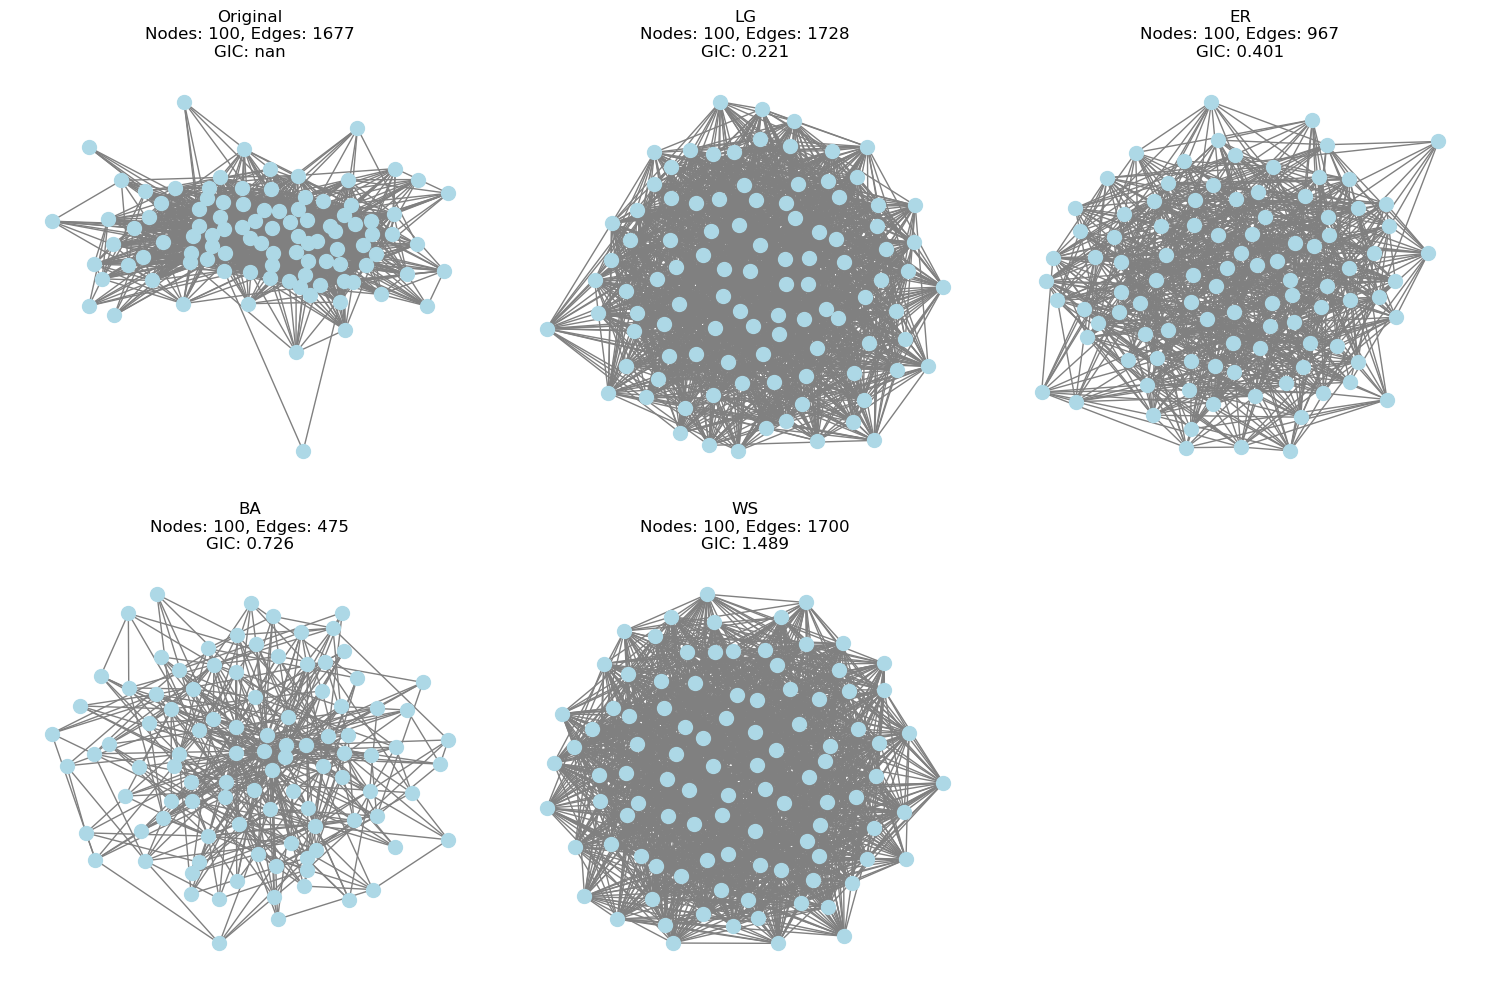

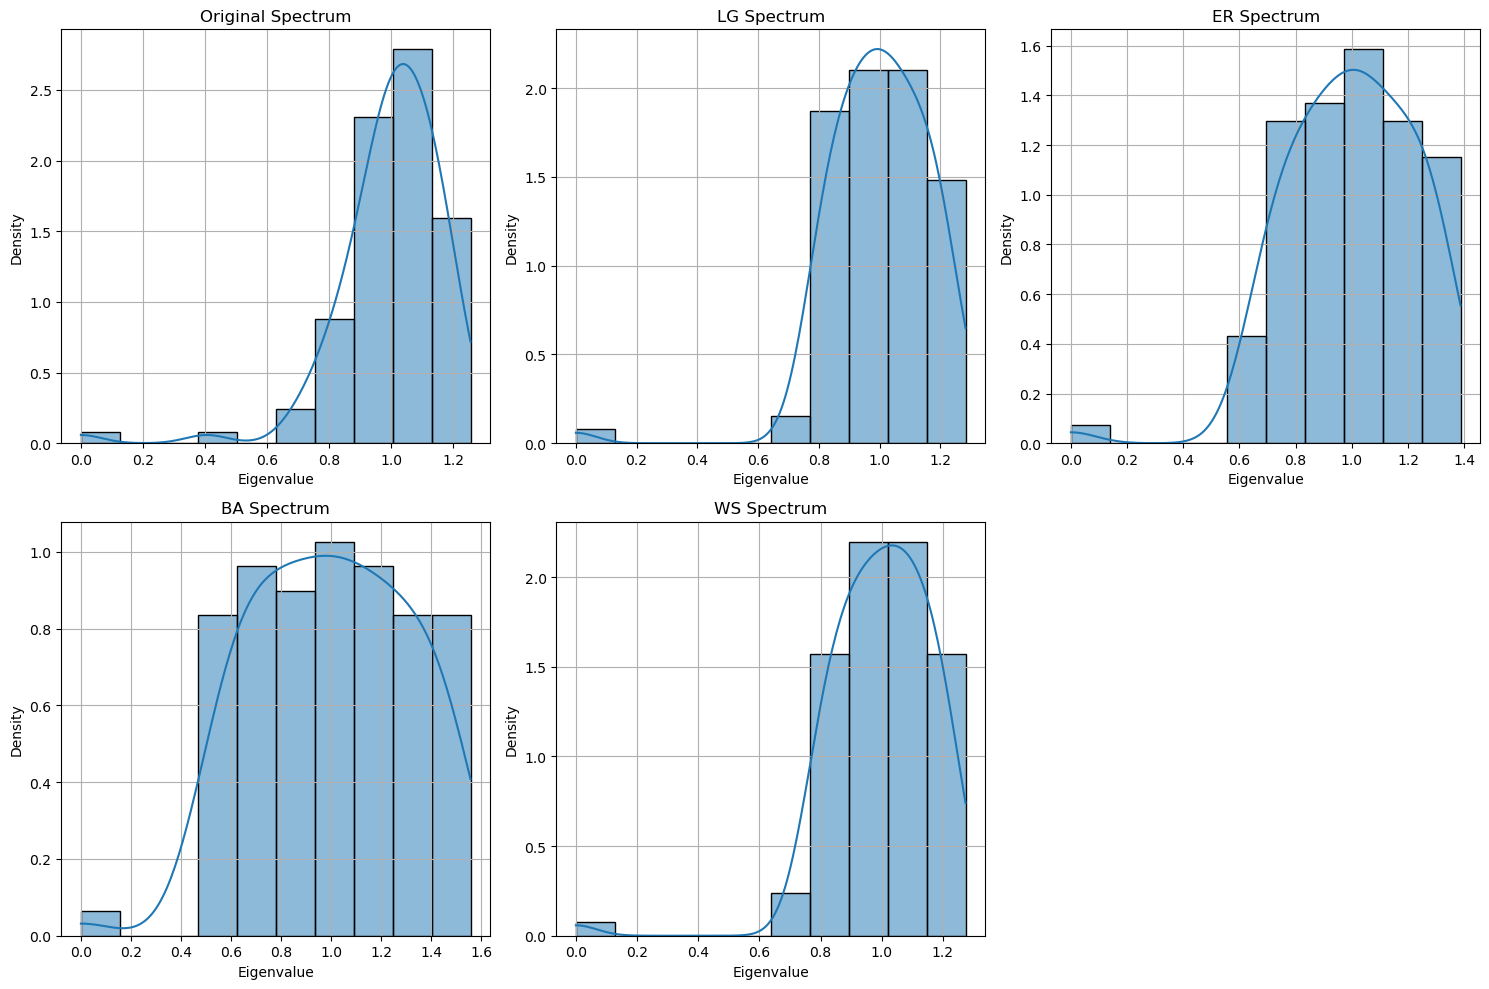

twitter_1


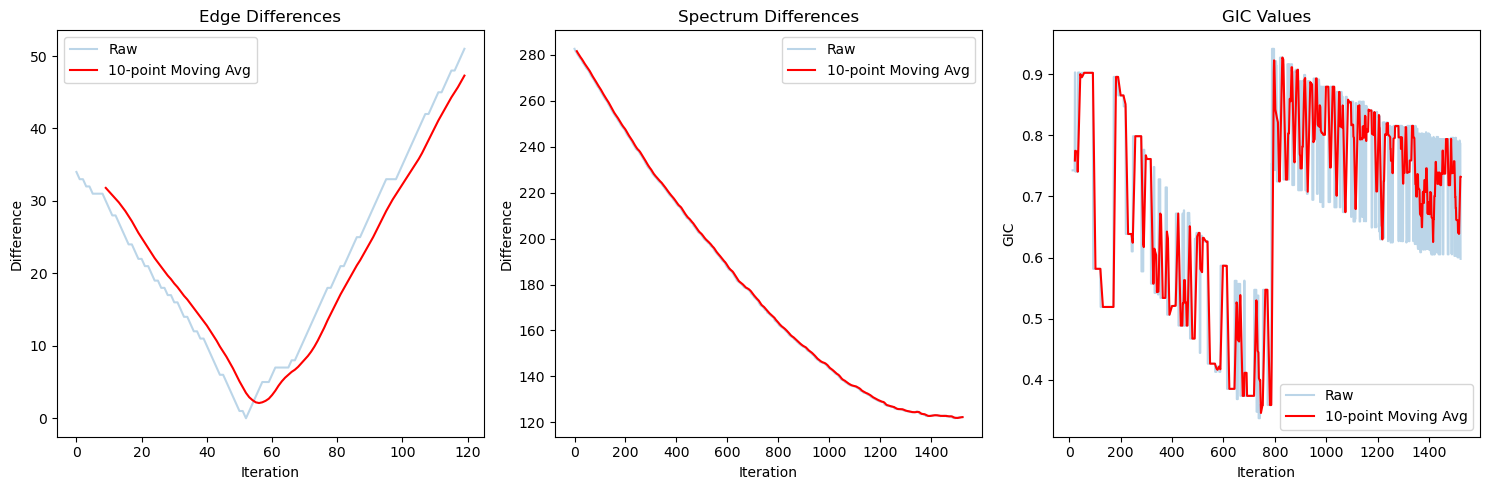

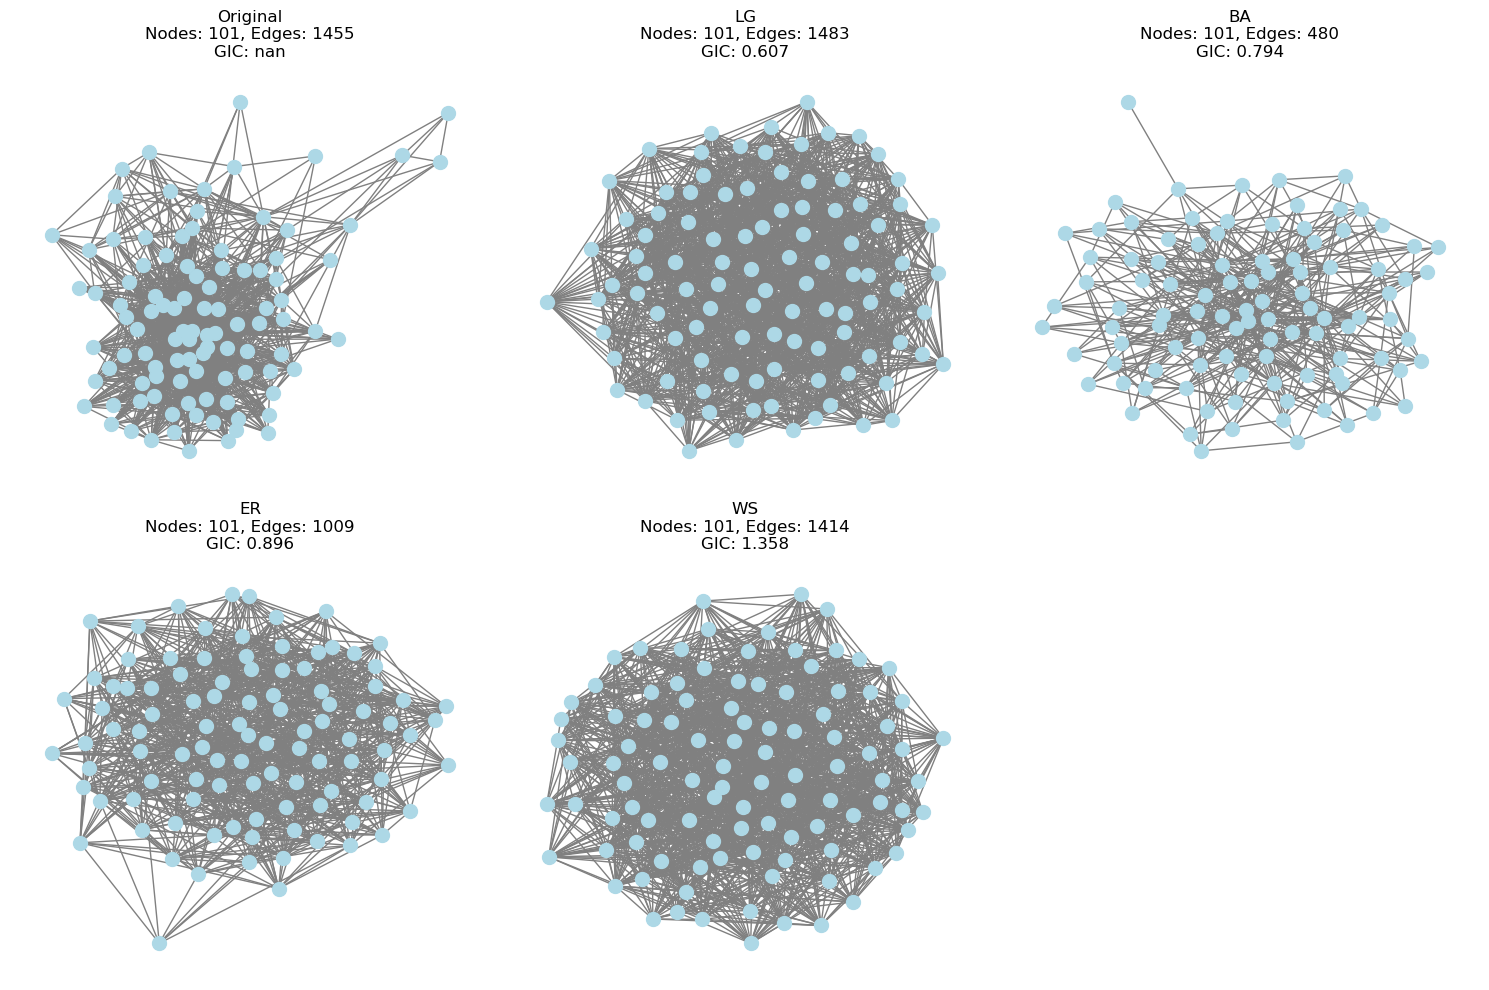

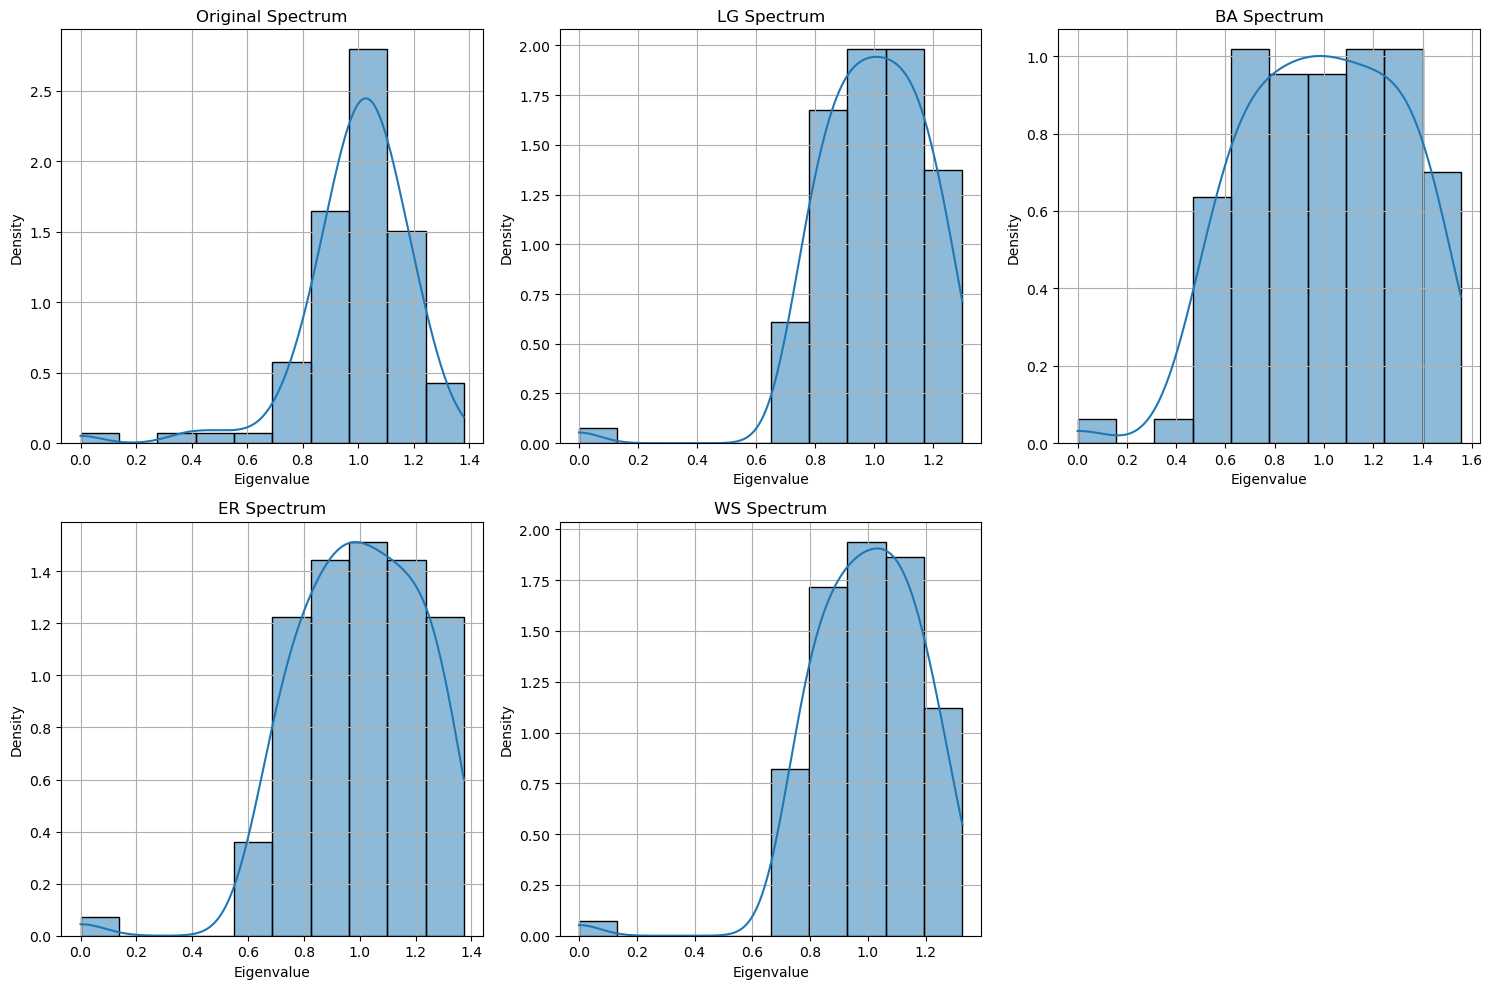

twitter_2


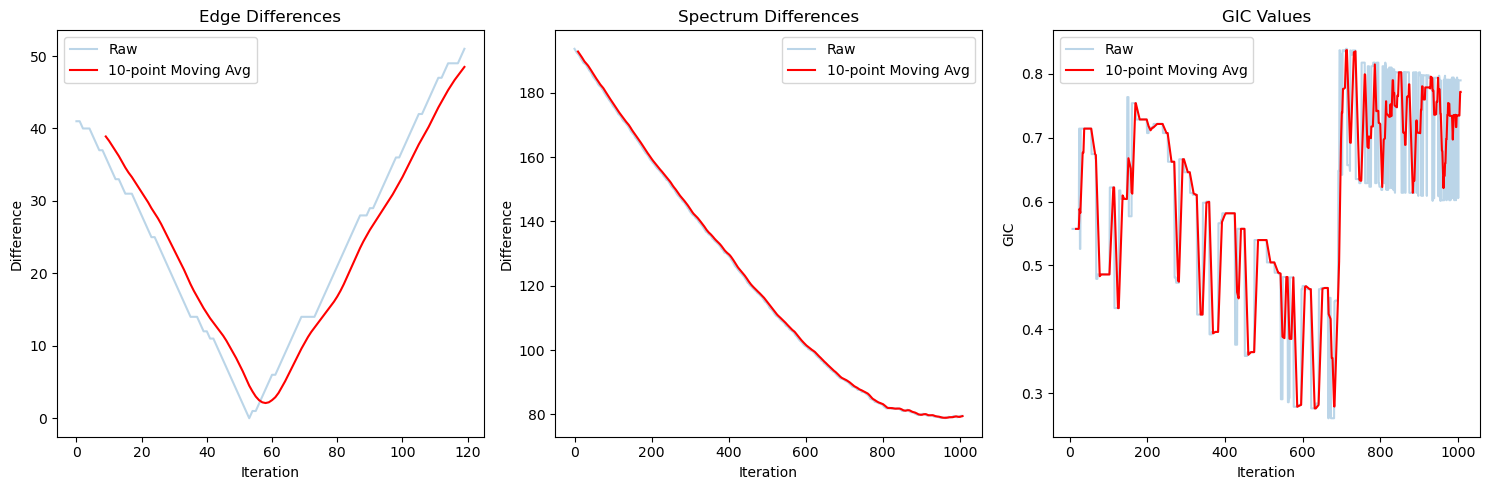

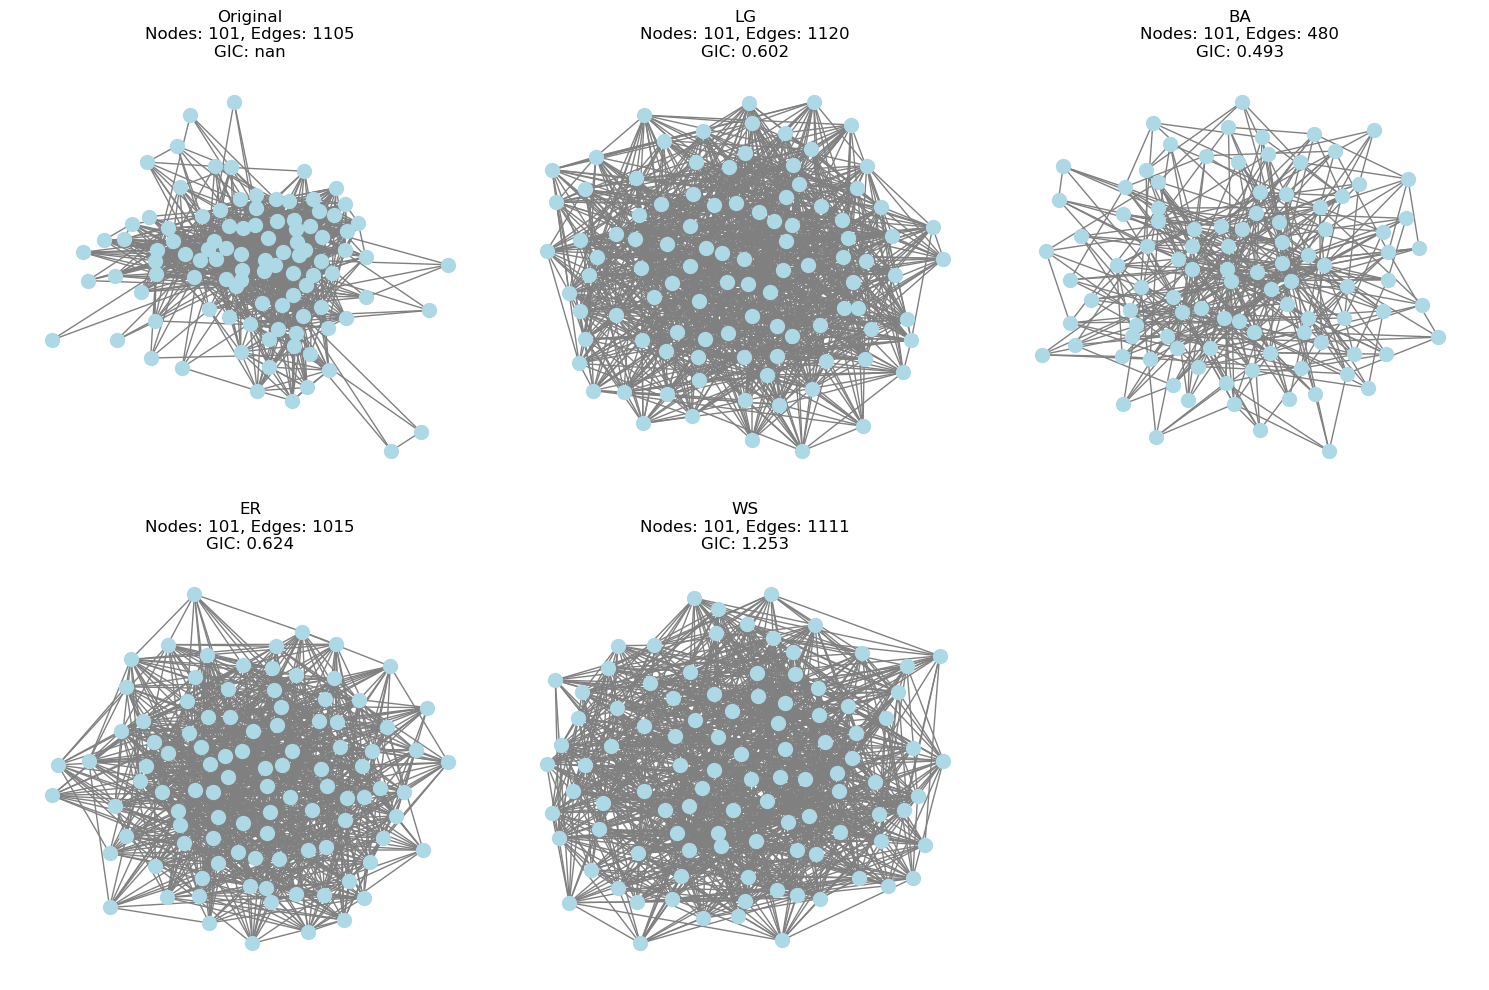

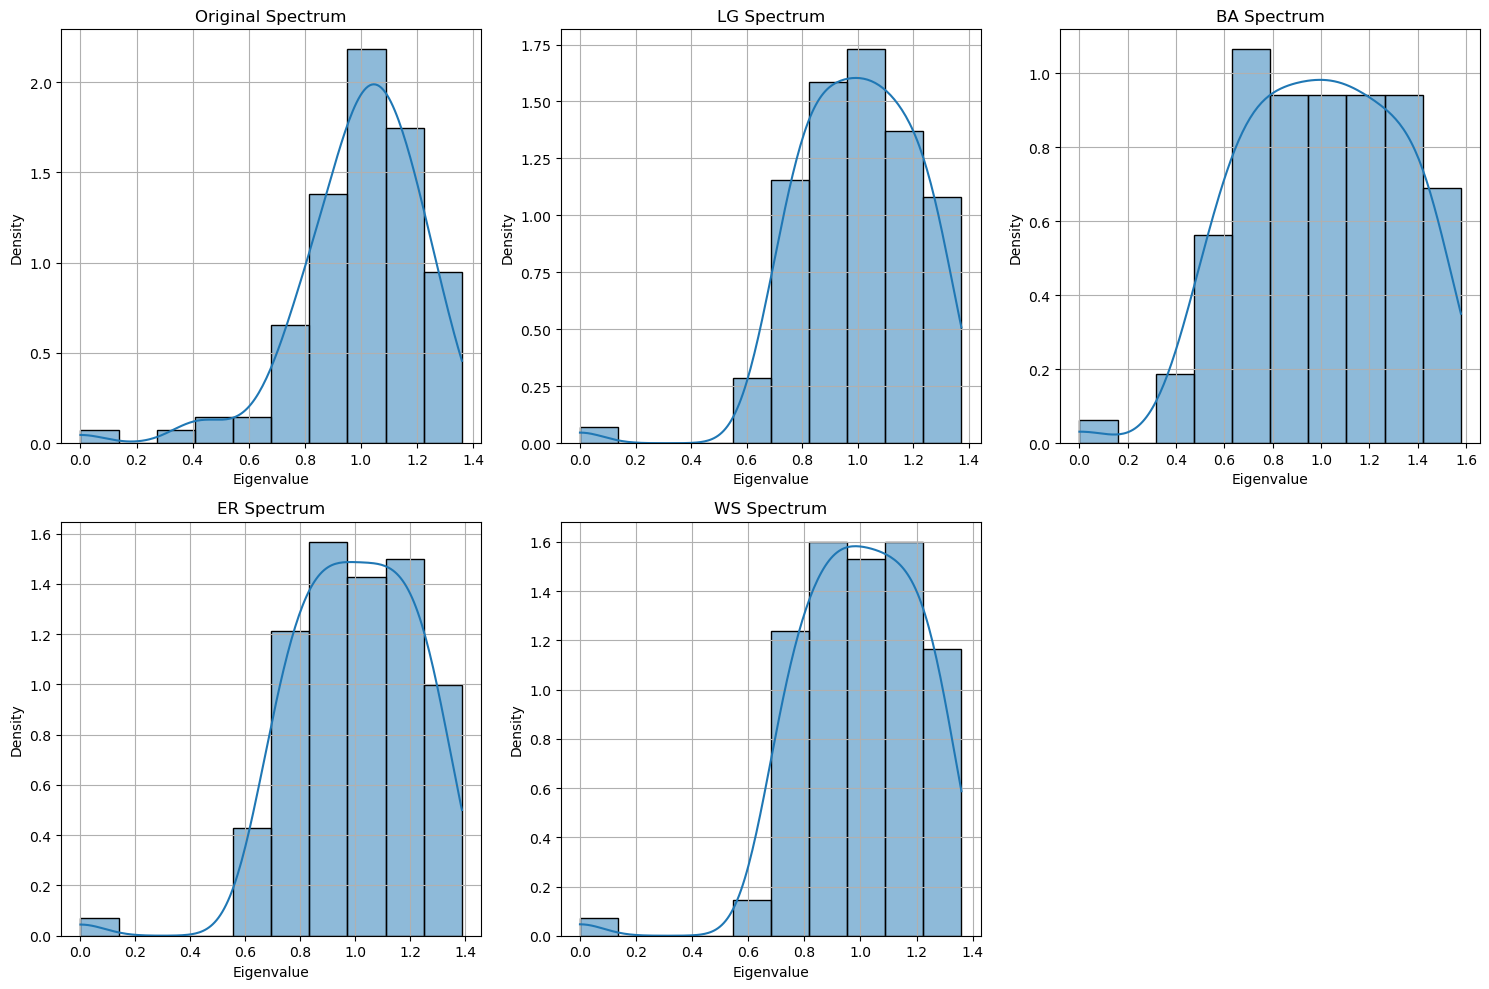

twitter_3


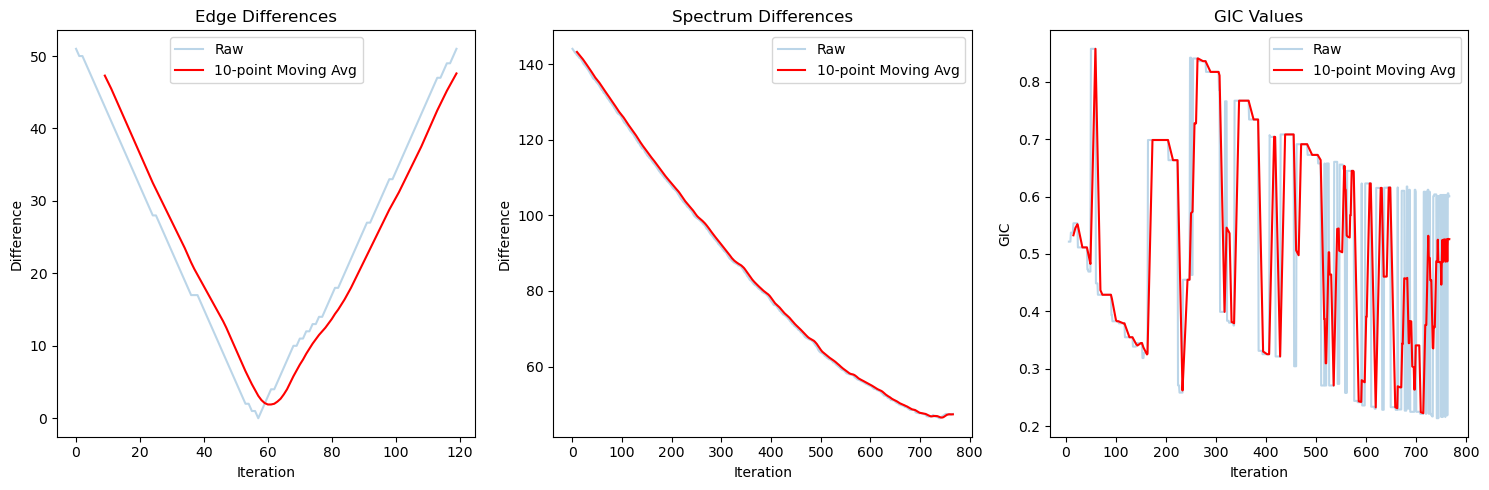

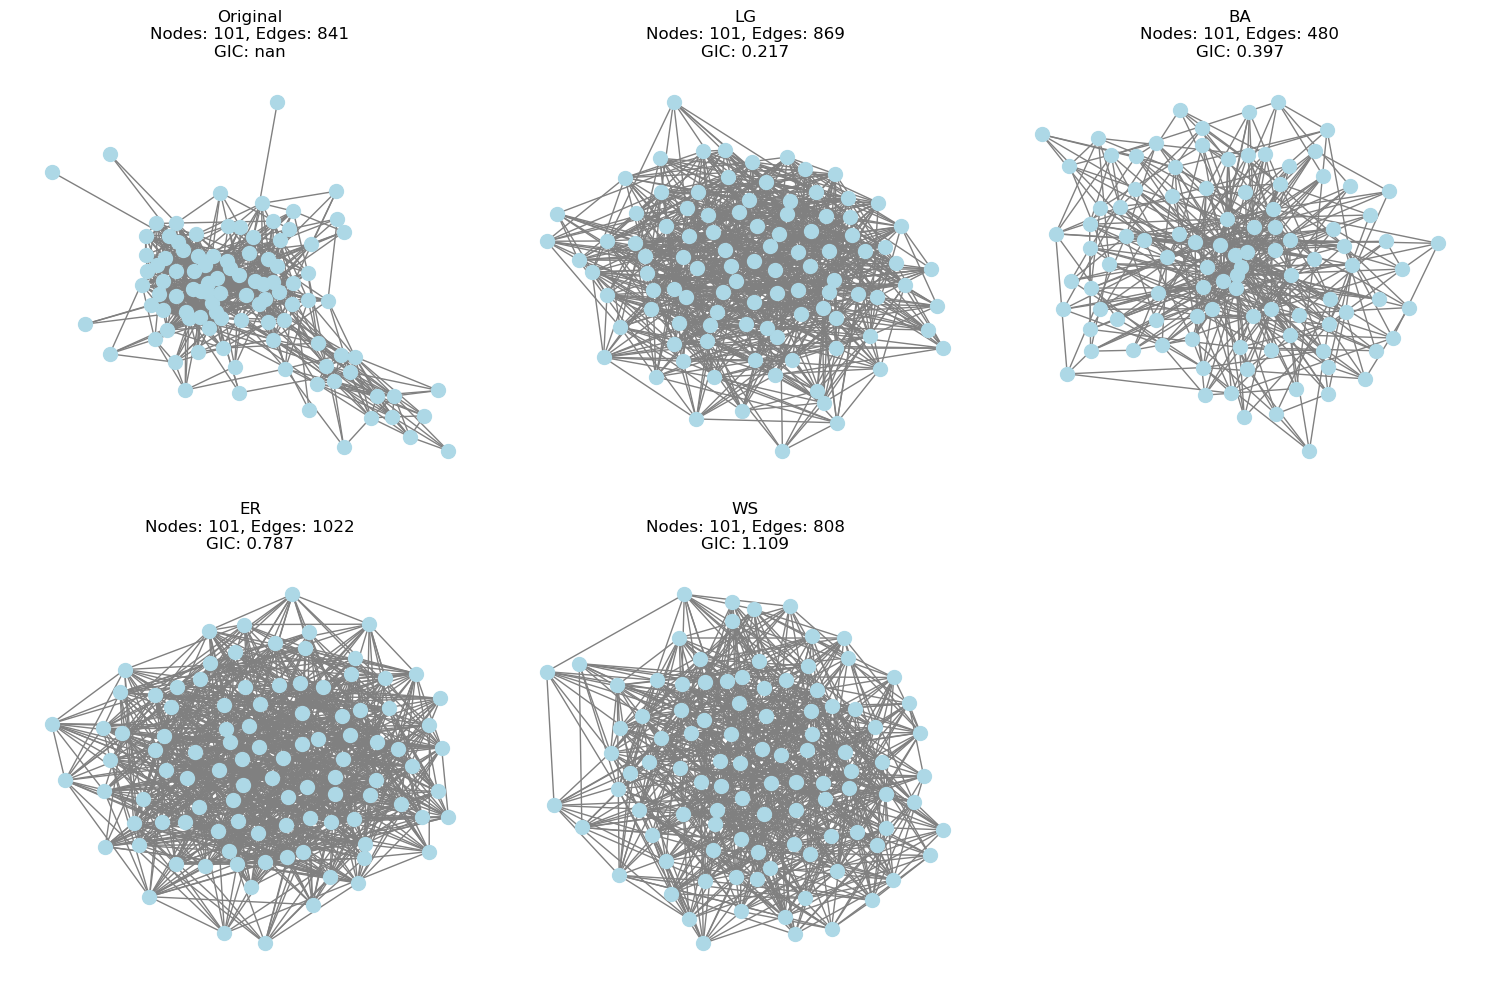

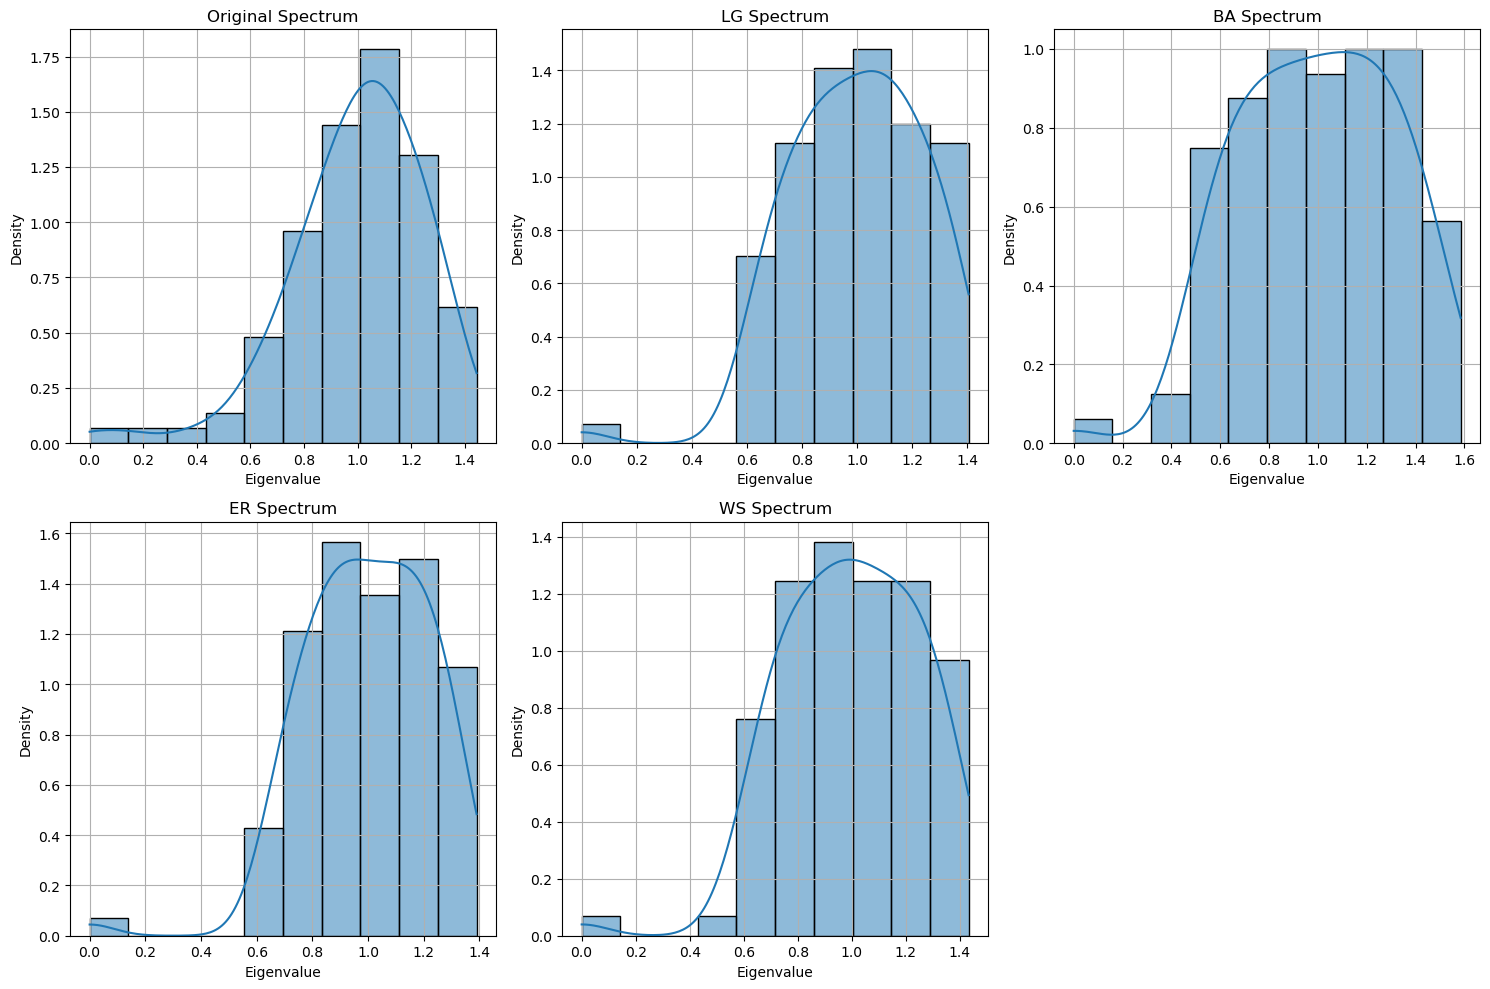

twitter_4


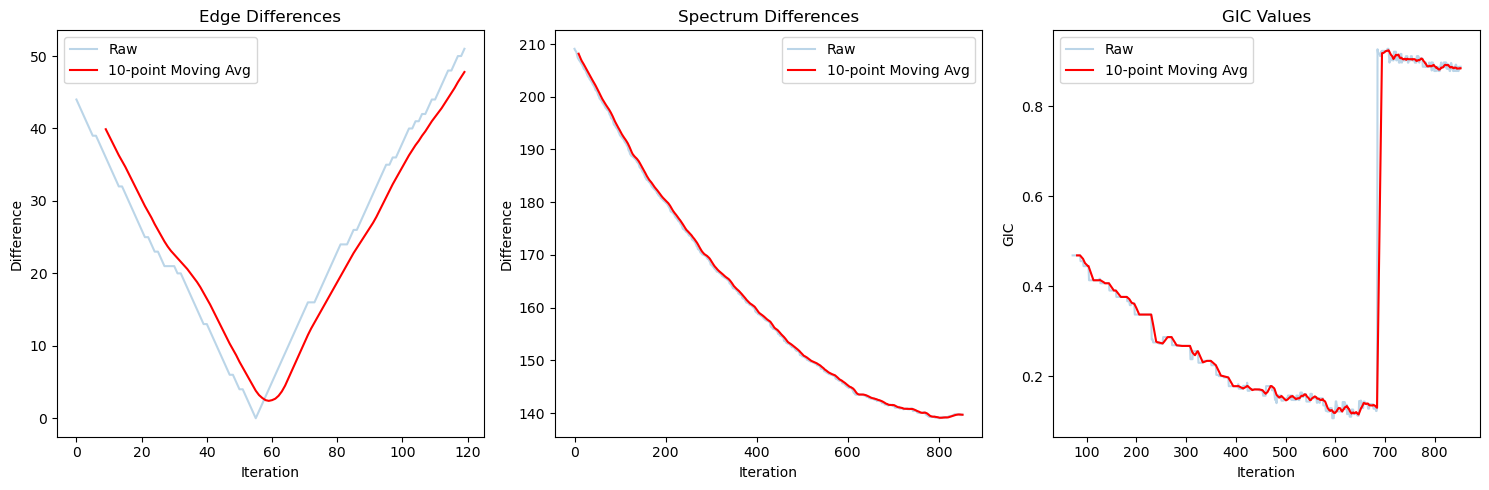

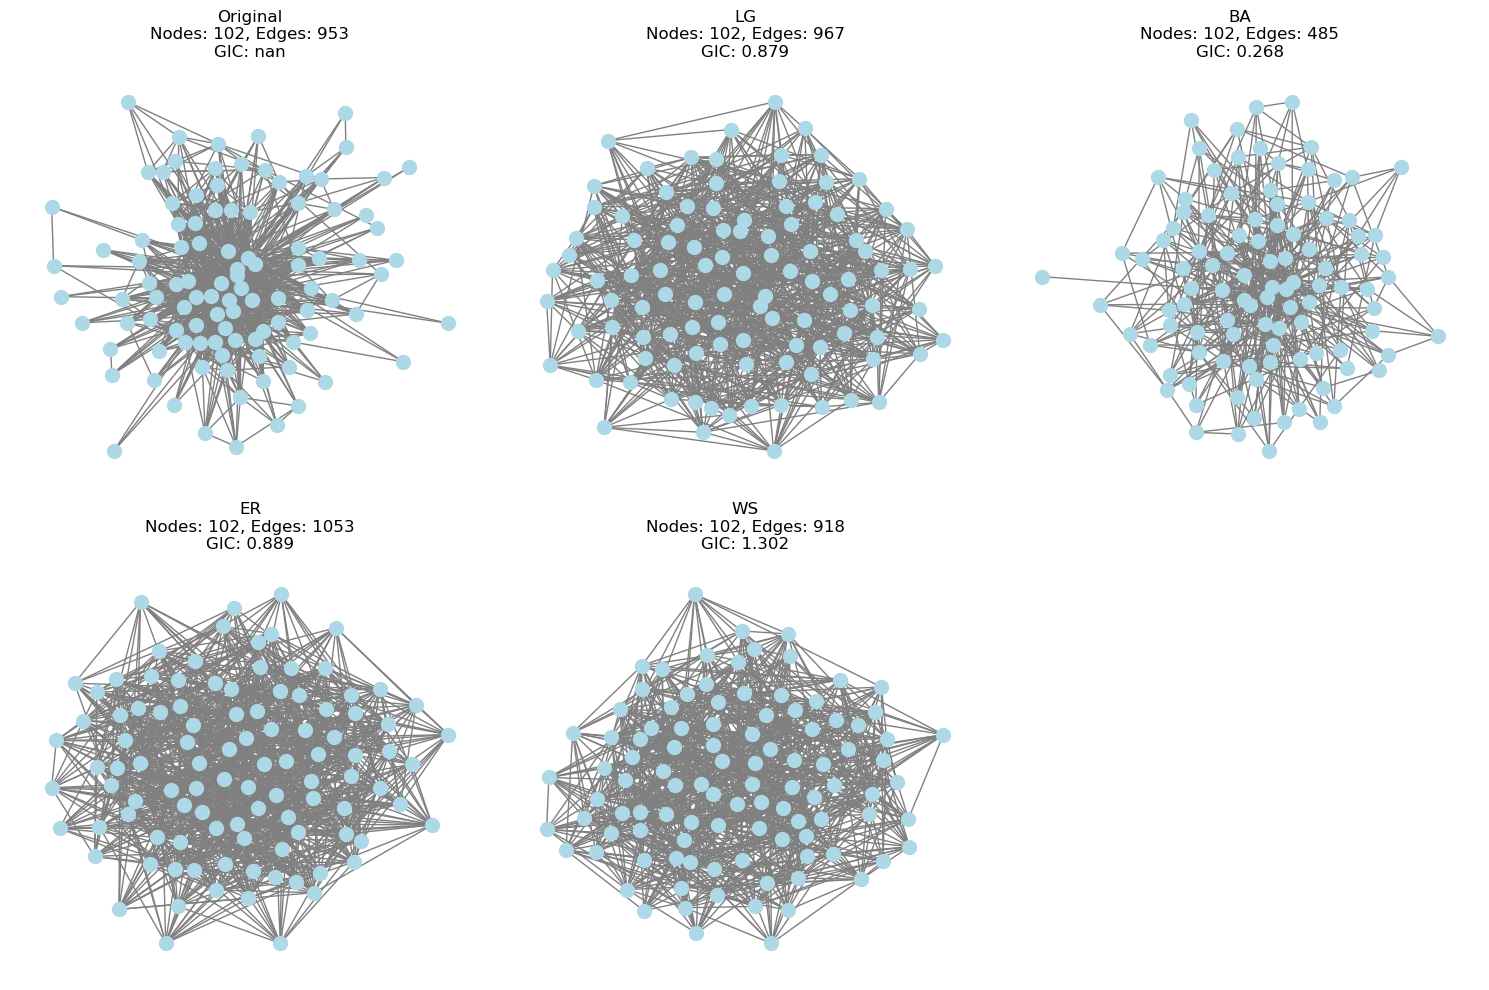

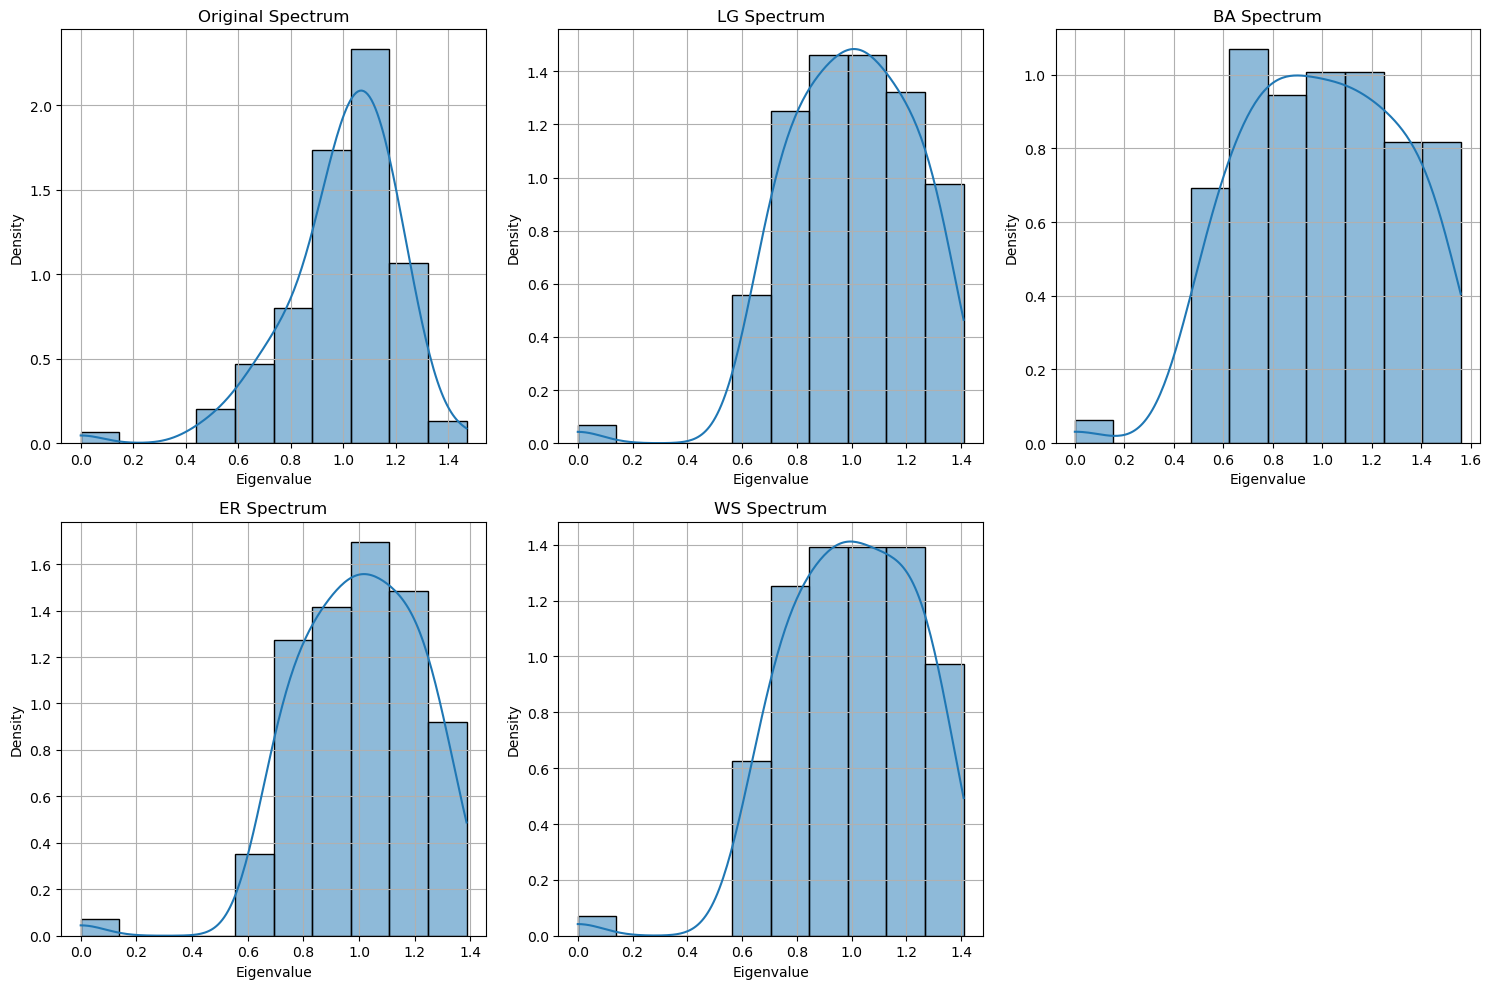

In [30]:
# Gen all plots
os.makedirs(f'imgs', exist_ok=True)
for i in range(len(comparators)):
    if i == 5:
        break
    graph = comparators[i]
    graph_name = f'twitter_{i}'
    print(graph_name)

    #graph = find_comparator_for_connectome('rhesus_cerebral.cortex_1.graphml')
    os.makedirs(f'imgs', exist_ok=True)
    spec_diff = graph.fitted_graphs_data['LG']['metadata']['spectrum_diffs']
    edge_diff = graph.fitted_graphs_data['LG']['metadata']['edge_diffs']
    gic_values = graph.fitted_graphs_data['LG']['metadata']['gic_values']

    # Calculate moving averages with window size of 10
    window = 10
    edge_diff_ma = pd.Series(edge_diff).rolling(window=window).mean()
    spec_diff_ma = pd.Series(spec_diff).rolling(window=window).mean()
    gic_values_ma = pd.Series(gic_values).rolling(window=window).mean()

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.plot(edge_diff, alpha=0.3, label='Raw')
    plt.plot(edge_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Edge Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(spec_diff, alpha=0.3, label='Raw')
    plt.plot(spec_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Spectrum Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(gic_values, alpha=0.3, label='Raw')
    plt.plot(gic_values_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('GIC Values')
    plt.xlabel('Iteration')
    plt.ylabel('GIC')
    plt.legend()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_iteration.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph2 = data['graph']
        pos = nx.spring_layout(graph2, seed=42)
        
        nx.draw(graph2, pos, ax=axes[i], 
                node_size=100,
                node_color='lightblue',
                edge_color='gray',
                with_labels=False)
        
        # Add title with model name and key metrics
        attrs = data['attributes']
        gic = data['metadata'].get('gic_value', 'N/A')
        title = f"{model}\n"
        title += f"Nodes: {attrs['nodes']}, Edges: {attrs['edges']}\n"
        # title += f"Density: {attrs['density']:.2f}\n"
        # title += f"Avg Clustering: {attrs['avg_clustering']:.2f}\n"
        title += f"GIC: {gic:.3f}" if isinstance(gic, float) else f"GIC: {gic}"
        axes[i].set_title(title)

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_graph.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot spectrum for each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph = data['graph']
        
        try:
            # Calculate eigenvalues
            L = nx.normalized_laplacian_matrix(graph)
            eigenvalues = np.linalg.eigvals(L.toarray())
            eigenvalues = np.real(eigenvalues)  # Get real parts
            
            # Plot histogram and KDE with reduced number of bins
            sns.histplot(data=eigenvalues, kde=True, ax=axes[i], stat='density', bins=10)
            axes[i].set_title(f"{model} Spectrum")
            axes[i].set_xlabel("Eigenvalue")
            axes[i].set_ylabel("Density")
            axes[i].grid(True)
        except MemoryError:
            axes[i].text(0.5, 0.5, "Memory Error", ha='center', va='center')
            axes[i].set_title(f"{model} Spectrum (Failed)")

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_spectrum.png', bbox_inches='tight', dpi=300)

    plt.show()

